# Formula 1, page 14 check

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
%matplotlib inline

#Set up the directories where the analysis is done and where the data is stored
base_dir="/export/data1/caplarn/Documents/Variability/GAIA/"
#Set up the directory where the figures are saved
path_figs=base_dir+"Figures/"
#Data is at http://www.astro.washington.edu/users/ivezic/macleod/qso_dr7/Southern.html
data_Stripe82_dir="/export/data1/caplarn/Documents/Variability/GAIA/QSO_S82"

In [155]:
os.chdir(data_Stripe82_dir)
listoffiles = [f for f in os.listdir(data_Stripe82_dir) if os.path.isfile(os.path.join(data_Stripe82_dir, f))]

In [156]:
#Import one light curve to inspect
#This can be skiped
#Format of each ligth curve is here: http://www.astro.washington.edu/users/ivezic/macleod/qso_dr7/Southern_format_LC.html
n=1
single_light_curve=np.loadtxt(listoffiles[n])

In [157]:
def compute_dif_of_Var_in_G_and_I(single_light_curve):
    #This part of code calculates excess variance in each band of SDSS
    #g-band is similar to BP of GAIA
    #i-band is similar to BR of GAIA 
    #[np.nonzero(g_band > -99)] and [np.nonzero(i_band > -99)] part of code remove epoch where there was no detection
    g_band=single_light_curve[0:,4]
    g_band_errors=single_light_curve[0:,5]
    i_band=single_light_curve[0:,10]
    i_band_errors=single_light_curve[0:,11]
    excess_variance_in_g_band=np.var(g_band[np.nonzero(g_band > -99)])-np.var(g_band_errors[np.nonzero(g_band > -99)])
    excess_variance_in_i_band=np.var(i_band[np.nonzero(i_band > -99)])-np.var(i_band_errors[np.nonzero(i_band > -99)])
    return excess_variance_in_g_band-excess_variance_in_i_band

In [158]:
#Takes around 20 sec on my computer
dif_of_Var_in_G_and_I = [];
for n in range(len(listoffiles)):
    single_light_curve=np.loadtxt(listoffiles[n])
    dif_of_Var_in_G_and_I.append(compute_dif_of_Var_in_G_and_I(single_light_curve))
dif_of_Var_in_G_and_I=np.array(dif_of_Var_in_G_and_I)

In [159]:
#This removes values which are far from 0, so that in next step we can see nicely the distribution
dif_of_Var_in_G_and_I_Cleaned=dif_of_Var_in_G_and_I[(dif_of_Var_in_G_and_I > -0.1) & (dif_of_Var_in_G_and_I < 0.1)]

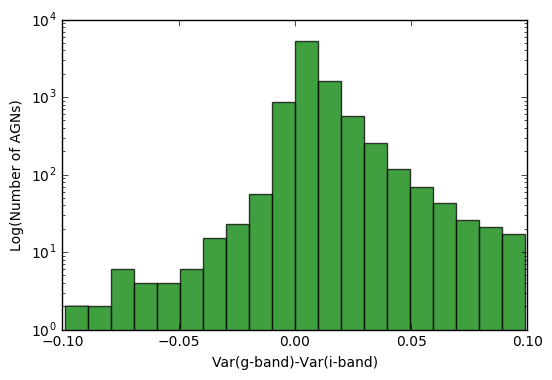

In [161]:
# the histogram of the data
n, bins, patches = plt.hist(dif_of_Var_in_G_and_I_Cleaned, 20,  facecolor='green', alpha=0.75)
plt.yscale('log')
plt.xlabel('Var(g-band)-Var(i-band)')
plt.ylabel('Log(Number of AGNs)')
fig = plt.gcf()
plt.savefig(path_figs + 'DifOfVar.pdf', bbox_inches='tight')
plt.show()
plt.close()

# Binning, page 18

In [162]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import generate_power_law
from astroML.fourier import PSD_continuous
import os
import sys
# N = How many points (NumberOfPoints)
# dt = Time separation between times simulated
# st = Random number
# beta = slope of PSD (slope proposed)
# factor = how disperseed

In [163]:
N=70
dt=int(5*365/N)
st=int(5353)
beta=float(2)
factor=float(0.01)

In [164]:
t = dt * np.arange(N)
x = factor * generate_power_law(N, dt, beta, random_state=st)

In [165]:
simulated_ligth_curve=np.c_[t,x]

In [166]:
array_of_magnitude_differences = [];
for n in range(len(simulated_ligth_curve)-1):
    array_of_magnitude_differences.append(simulated_ligth_curve[n]-simulated_ligth_curve[n+1:])
array_of_magnitude_differences=np.vstack(array_of_magnitude_differences)
array_of_magnitude_differences[:,0]=array_of_magnitude_differences[:,0]*(-1)

In [167]:
#linear SF^2
Structure_Function_Linear_Bins = [];
for n in range(1,N-1):
    single_bin=array_of_magnitude_differences[((n*dt-0.5*dt)<(array_of_magnitude_differences[:,0]))&((array_of_magnitude_differences[:,0])<((n+1)*dt+.5*dt))]   
    Structure_Function_Linear_Bins.append([np.mean(single_bin[:,0]),np.var(single_bin[:,1])])
Structure_Function_Linear_Bins=np.vstack(Structure_Function_Linear_Bins)

In [168]:
#log SF^2
Structure_Function_Log_Bins = [];
Array_Of_Log_Limits=np.percentile(np.log10(array_of_magnitude_differences[:,0]),range(0,100,5))
for n in range(1,len(Array_Of_Log_Limits)-1):
    single_bin=array_of_magnitude_differences[((Array_Of_Log_Limits[n])<=(np.log10(array_of_magnitude_differences[:,0])))&((np.log10(array_of_magnitude_differences[:,0]))<=Array_Of_Log_Limits[n+1])]   
    Structure_Function_Log_Bins.append([np.mean(single_bin[:,0]),np.var(single_bin[:,1])])
Structure_Function_Log_Bins=np.vstack(Structure_Function_Log_Bins)

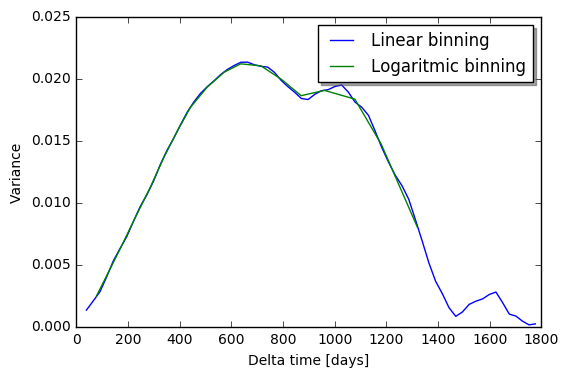

In [169]:
x_lin=Structure_Function_Linear_Bins[:,0]
y_lin=Structure_Function_Linear_Bins[:,1]
x_log=Structure_Function_Log_Bins[:,0]
y_log=Structure_Function_Log_Bins[:,1]
plt.plot(x_lin,y_lin,label='Linear binning')
plt.plot(x_log,y_log,label='Logaritmic binning')
legend = plt.legend(loc='upper right', shadow=True)
plt.xlabel('Delta time [days]')
plt.ylabel('Variance')
fig = plt.gcf()
plt.savefig(path_figs + 'LogOrLin.pdf', bbox_inches='tight')
plt.show()
plt.close()

# Slope calculation, page 21

In [170]:
N=7000
dt=int(100*5*365/N)
st=int(5353)
beta=float(2)
factor=float(0.01)

In [171]:
t = dt * np.arange(N)
x = factor * generate_power_law(N, dt, beta, random_state=st)

In [172]:
simulated_ligth_curve=np.c_[t,x]

In [173]:
def Compute_SF(light_curve,last_value,p):
    # Simple function to compute the structure function squared
    # light_curve = supplied light curve
    # last_value, takes input from 0 to 100 and determines to the fraction of the time bins to compute (100 = all the time bins possible, 10=10% of possible time bins, etc...)
    # p = how finely to split time bins; smaller number = better sampling
    array_of_magnitude_differences = [];
    for n in range(len(light_curve)-1):
        array_of_magnitude_differences.append(light_curve[n]-light_curve[n+1:])
    array_of_magnitude_differences=np.vstack(array_of_magnitude_differences)
    array_of_magnitude_differences[:,0]=array_of_magnitude_differences[:,0]*(-1)
    Structure_Function_Log_Bins_Full = [];
    Array_Of_Log_Limits=np.percentile(np.log10(array_of_magnitude_differences[:,0]),np.arange(0,last_value,p))
    for n in range(1,len(Array_Of_Log_Limits)-1):
        single_bin=array_of_magnitude_differences[((Array_Of_Log_Limits[n])<=(np.log10(array_of_magnitude_differences[:,0])))&((np.log10(array_of_magnitude_differences[:,0]))<=Array_Of_Log_Limits[n+1])]   
        Structure_Function_Log_Bins_Full.append([np.mean(single_bin[:,0]),np.var(single_bin[:,1])])
    Structure_Function_Log_Bins_Full=np.vstack(Structure_Function_Log_Bins_Full)
    return Structure_Function_Log_Bins_Full

In [174]:
Structure_Function_Log_Bins_Full=Compute_SF(simulated_ligth_curve,2,0.1)

In [175]:
Structure_Function_Log_Bins_1=Compute_SF(simulated_ligth_curve[500:570],100,5)
j=2000
Structure_Function_Log_Bins_2=Compute_SF(simulated_ligth_curve[(j):(j+70)],100,5)
j=5000
Structure_Function_Log_Bins_3=Compute_SF(simulated_ligth_curve[(j):(j+70)],100,5)

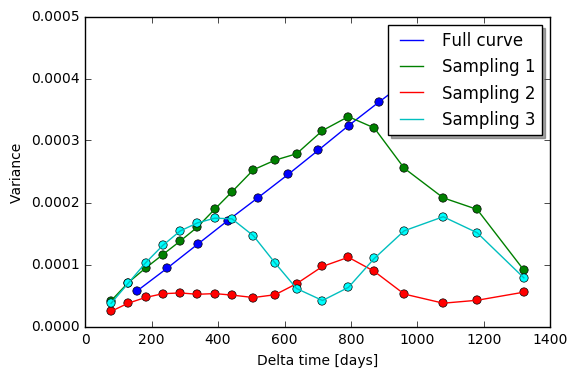

In [176]:
x_full=Structure_Function_Log_Bins_Full[:,0][:10]
y_full=Structure_Function_Log_Bins_Full[:,1][:10]
x_1=Structure_Function_Log_Bins_1[:,0][:20]
y_1=Structure_Function_Log_Bins_1[:,1][:20]
x_2=Structure_Function_Log_Bins_2[:,0][:20]
y_2=Structure_Function_Log_Bins_2[:,1][:20]
x_3=Structure_Function_Log_Bins_3[:,0][:20]
y_3=Structure_Function_Log_Bins_3[:,1][:20]
plt.plot(x_full,y_full,'bo')
plt.plot(x_full,y_full,label='Full curve')
plt.plot(x_1,y_1,'bo',c="g")
plt.plot(x_1,y_1,label='Sampling 1')
plt.plot(x_2,y_2,'bo',c="r")
plt.plot(x_2,y_2,label='Sampling 2')
plt.plot(x_3,y_3,'bo',c="cyan")
plt.plot(x_3,y_3,label='Sampling 3')
plt.axis([0, 1400, 0, 0.00050])
legend = plt.legend(loc='upper right', shadow=True)
plt.xlabel('Delta time [days]')
plt.ylabel('Variance')
fig = plt.gcf()
plt.savefig(path_figs + 'SF.pdf', bbox_inches='tight')
plt.show()
plt.close()

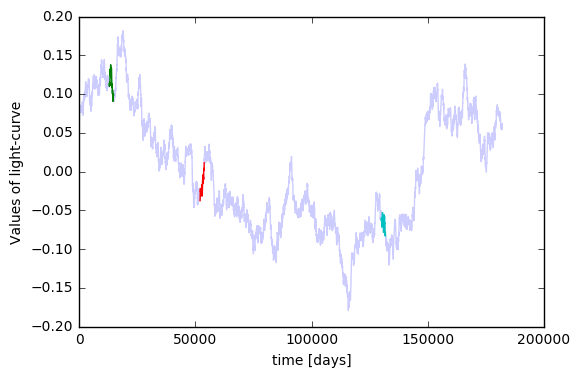

In [177]:
plt.plot(simulated_ligth_curve[:,0],simulated_ligth_curve[:,1],alpha=0.2)
plt.plot(simulated_ligth_curve[500:570][:,0],simulated_ligth_curve[500:570][:,1])
plt.plot(simulated_ligth_curve[2000:2070][:,0],simulated_ligth_curve[2000:2070][:,1])
plt.plot(simulated_ligth_curve[5000:5070][:,0],simulated_ligth_curve[5000:5070][:,1])
plt.xlabel('time [days]')
plt.ylabel('Values of light-curve')
fig = plt.gcf()
plt.savefig(path_figs + 'LC.pdf', bbox_inches='tight')
plt.show()
plt.close()

# Influence of error on SF


In [178]:
N=700
dt=int(10*5*365/N)
st=int(5353)
beta=float(2)
factor=float(0.01)

In [179]:
#same as above, just added a bit of random error
t = dt * np.arange(N)
x = factor * generate_power_law(N, dt, beta, random_state=st)
x_noise = 100*factor * generate_power_law(N, dt, 0, random_state=st+5)
simulated_ligth_curve=np.c_[t,x]
simulated_ligth_curve_with_noise=np.c_[t,x_noise+x]


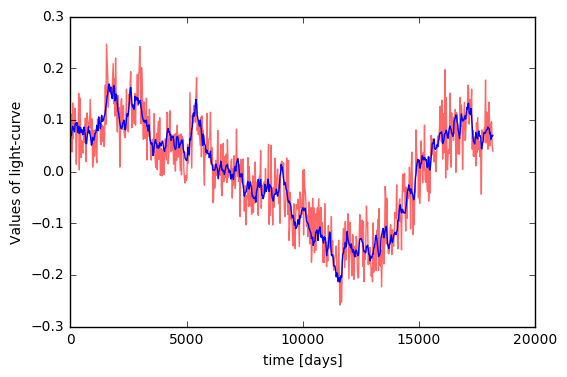

In [181]:
plt.plot(simulated_ligth_curve_with_noise[:,0],simulated_ligth_curve_with_noise[:,1],alpha=0.6,c="r")
plt.plot(simulated_ligth_curve[:,0],simulated_ligth_curve[:,1],alpha=1)
plt.xlabel('time [days]')
plt.ylabel('Values of light-curve')
fig = plt.gcf()
plt.savefig(path_figs + 'LcWithError.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [182]:
Structure_Function_Log_Bins_Full_With_Noise=Compute_SF(simulated_ligth_curve_with_noise,20,1)
Structure_Function_Log_Bins_Full=Compute_SF(simulated_ligth_curve,20,1)

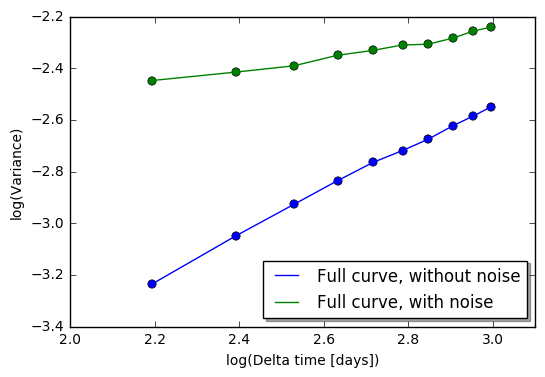

In [183]:
x_full=np.log10(Structure_Function_Log_Bins_Full[:,0][:10])
y_full=np.log10(Structure_Function_Log_Bins_Full[:,1][:10])
x_full_with_noise=np.log10(Structure_Function_Log_Bins_Full_With_Noise[:,0][:10])
y_full_with_noise=np.log10(Structure_Function_Log_Bins_Full_With_Noise[:,1][:10])
plt.plot(x_full,y_full,'bo')
plt.plot(x_full,y_full,label='Full curve, without noise')
plt.plot(x_full_with_noise,y_full_with_noise,'bo',c="g")
plt.plot(x_full_with_noise,y_full_with_noise,label='Full curve, with noise')
legend = plt.legend(loc='lower right', shadow=True)
plt.axis([2, 3.1, -3.4, -2.2])
plt.xlabel('log(Delta time [days])')
plt.ylabel('log(Variance)')
fig = plt.gcf()
plt.savefig(path_figs + 'EffectOfError.pdf', bbox_inches='tight')
plt.show()
plt.close()